<a href="https://colab.research.google.com/github/BrendaGuadalupeVazquez/INVESTIGACI-N-DE-OPERACIONES/blob/main/TutorialNetworkx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Dibujo de redes**
Vázquez Romero Brenda Guadalupe

---



Ejercicio 10 de Septiembre 2025

La librería Networkx es una herramienta que nos permite:

*   Crear grafos (dirigidos, no dirigidos y multigrafos)

*   Manipular redes complejas (agregar nodos, aristas, atributos)

*   Analizar propiedades (grados, caminos, conectividad, etc.)

*   Visualizar grafoss de forma sencilla

---



Como primer paso instalaremos la librería (para Google colab ya no es necesario, ya está incluida)

Para eso, en una celda de código escribiremos lo siguiente:

In [39]:
#!pip install networkx

Ahora ya instalada, vamor a importar la librería de networkx y también importaremos matplotlib para los gráficos

In [40]:
import networkx as nx
import matplotlib.pyplot as plt

Hay dos tipos principales de grafos:
- **Grafos no dirigidos**: Las aristas no tienen dirección.
- **Grafos dirigidos**: Las aristas tienen dirección (tipo flecha).

---


##Grafo no dirigido (simple)

A continuación, vamos a crear un grafo no dirigido simple con 4 nodos

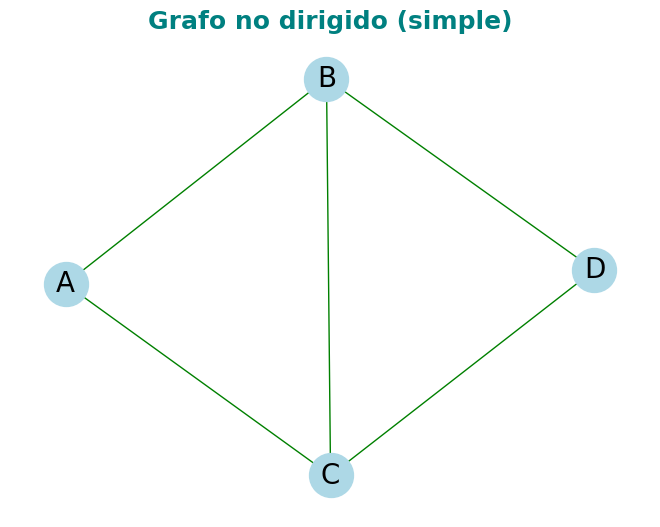

In [41]:
G=nx.Graph() #Grafo no dirigido
G.add_nodes_from(["A", "B", "C", "D"]) #Creamos los nodos
G.add_edge("A","B") #Creamos las aristas
G.add_edge("B","C")
G.add_edge("A","C")
G.add_edge("B","D")
G.add_edge("C","D")
#Graficamos
nx.draw(G,with_labels=True,node_color='lightblue',edge_color='green',node_size=1000,font_size=20)
plt.title("Grafo no dirigido (simple)", color='teal',fontsize=18, fontweight='bold')
plt.show()




---


##Grafo dirigido (con capacidades)
A continuación se crea un grafo con nodos A, B, C, D y capacidades entre ellos:

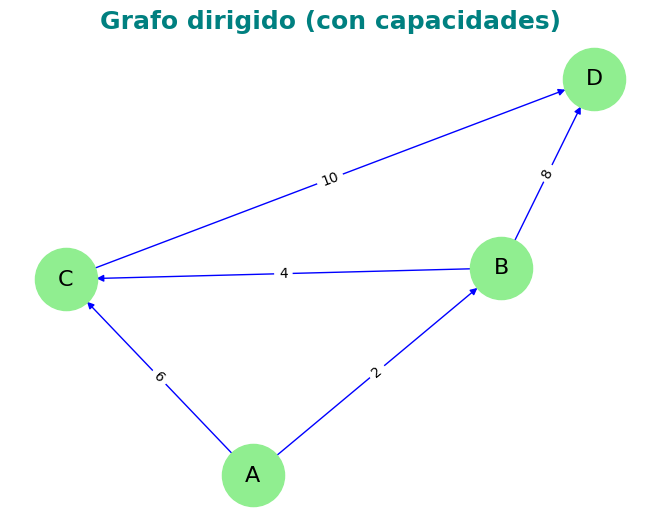

In [42]:
G=nx.DiGraph() #Grafico dirigido
G.add_edge("A","B", capacity=2)#Crea una arista dirigida del nodo A al B, con capacidad 2
G.add_edge("B","C", capacity=4)
G.add_edge("A","C",capacity=6)
G.add_edge("B","D",capacity=8)
G.add_edge("C","D",capacity=10)
#Graficamos
pos = nx.spring_layout(G) #Nos ayuda a distribuir/posicionar los nodos
capacities=nx.get_edge_attributes(G,'capacity')#Extraemos las capacidades para las aristas
nx.draw(G, pos, with_labels=True, node_color='lightgreen',edge_color='blue', node_size=2000, font_size=16, arrows=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels=capacities)
plt.title("Grafo dirigido (con capacidades)", color='teal',fontsize=18, fontweight='bold')
plt.show()

Utilizando este tipo de rutas dirigidas podemos calcular el flujo máximo desde un nodo fuente hasta un nodo destino, utilizando las capacidades de las aristas.
A continuación, vamos a calcular el flujo máximo que hay desde el nodo A hasta el nodo D

In [43]:
from tabulate import tabulate #Importamos para realizar la tabla
flujo_max, flujo_por_arista = nx.maximum_flow(G, "A", "D", capacity="capacity")#Calcular flujo máximo desde A a D
print("Flujo máximo desde A hasta D:", flujo_max)
print("\nDetalle del flujo por arista:")
tabla=[]
for u, dic in flujo_por_arista.items():
    for v, f in dic.items():
        tabla.append([u, v, f, G[u][v]['capacity']])
print("\nDetalle del flujo:")
print(tabulate(tabla, headers=["Desde", "Hacia", "Flujo", "Capacidad"], tablefmt="grid"))

Flujo máximo desde A hasta D: 8

Detalle del flujo por arista:

Detalle del flujo:
+---------+---------+---------+-------------+
| Desde   | Hacia   |   Flujo |   Capacidad |
+=========+=========+=========+=============+
| A       | B       |       2 |           2 |
+---------+---------+---------+-------------+
| A       | C       |       6 |           6 |
+---------+---------+---------+-------------+
| B       | C       |       0 |           4 |
+---------+---------+---------+-------------+
| B       | D       |       2 |           8 |
+---------+---------+---------+-------------+
| C       | D       |       6 |          10 |
+---------+---------+---------+-------------+
